<a href="https://colab.research.google.com/github/rlatndnd9804/pdm03/blob/main/notebook/chap04_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chap04. linear regression
## PDM04 

## 선형회기 - 경사하강법


1.2532418085611319 2.745502230882486


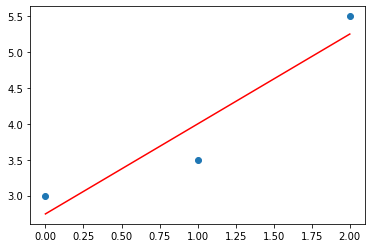

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0.0, 1.0, 2.0])
y = np.array([3.0, 3.5, 5.5])

# 파라미터 초기화
w = 0       # 기울기
b = 0       # 절편

lrate = 0.01  # 학습률
epochs = 1000  # 반복 횟수

n = float(len(X)) # 입력 데이터의 개수

# 경사 하강법
for i in range(epochs): 
    y_pred = w*X + b  			# 선형 회귀 예측값
    dw = (2/n) * sum(X * (y_pred-y)) 	# 넘파이 배열간의 산술 계산은 요소별로 적용
    db = (2/n) * sum(y_pred-y)  	# sum()은 모든 요소들의 합을 계산하는 내장 함수
    w = w - lrate * dw  		# 기울기 수정
    b = b - lrate * db  		# 절편 수정
    
# 기울기와 절편을 출력한다. 
print (w, b)

# 예측값을 만든다.
y_pred = w*X + b

# 입력 데이터를 그래프 상에 찍는다. 
plt.scatter(X, y) 

# 예측값은 선그래프로 그린다. 
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.show()


##선형회기
- sklearn LinearRegression

[1.25]
2.7500000000000004
0.8928571428571429
[9.]


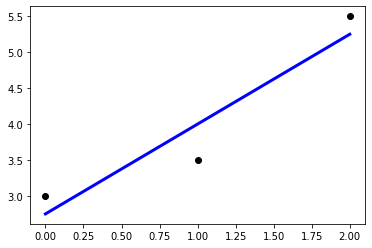

0.8928571428571429


In [2]:
import matplotlib.pylab as plt
from sklearn import linear_model

# 선형 회귀 모델을 생성한다. 
reg = linear_model.LinearRegression()

# 데이터는 파이썬의 리스트로 만들어도 되고 아니면 넘파이의 배열로 만들어도 됨
X = [[0], [1], [2]]		# 반드시 2차원으로 만들어야 함
y = [3, 3.5, 5.5]		# y = x + 3

# 학습을 시킨다. 
reg.fit(X, y)	

print(reg.coef_)		# 직선의 기울기
print(reg.intercept_) 	# 직선의 y-절편 
print(reg.score(X, y))

print(reg.predict([[5]]))

# 학습 데이터와 y 값을 산포도로 그린다. 
plt.scatter(X, y, color='black')

# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = reg.predict(X)

# 학습 데이터와 예측값으로 선그래프로 그린다. 
# 계산된 기울기와 y 절편을 가지는 직선이 그려진다. 
plt.plot(X, y_pred, color='blue', linewidth=3)		
plt.show()

y_pred = reg.predict(X)
from sklearn.metrics import r2_score
print(r2_score(y, y_pred))



## Lab1
- 키와 몸무게의 선형회기 모형

0.9812769231994423
[67.30998637]


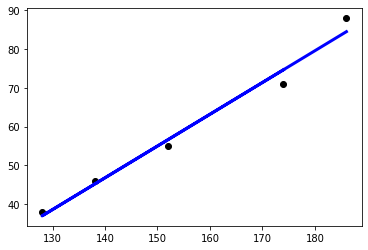

In [3]:
import matplotlib.pylab as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = [[174], [152], [138], [128], [186]]		
y = [71, 55, 46, 38, 88]	

reg.fit(X, y)			# 학습
# 평가
print(reg.score(X, y))
# 에측
print(reg.predict([[165]]))

# 학습 데이터와 y 값을 산포도로 그린다. 
plt.scatter(X, y, color='black')

# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = reg.predict(X)

# 학습 데이터와 예측값으로 선그래프로 그린다. 
# 계산된 기울기와 y 절편을 가지는 직선이 그려진다. 
plt.plot(X, y_pred, color='blue', linewidth=3)		
plt.show()


## Lab2
- 당뇨병 데이터의 선형회기
- 데이터프레임 이용한 선형회기
- 당뇨병데이터의 시각화
  * 상관도표
  * pairplot

(442, 10)
(442, 1)
0.3554944130715041


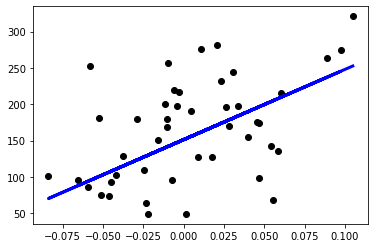

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

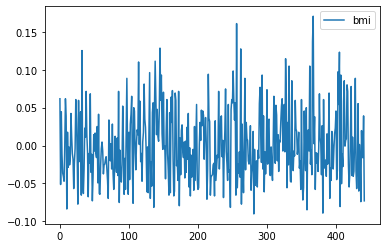

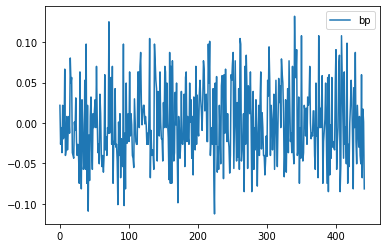

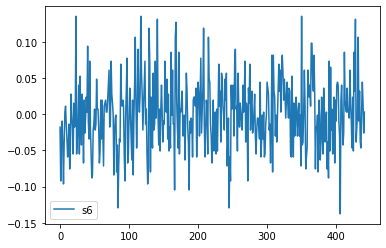

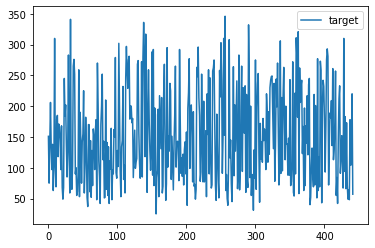

0.15085709705188155


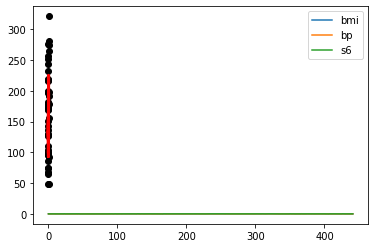

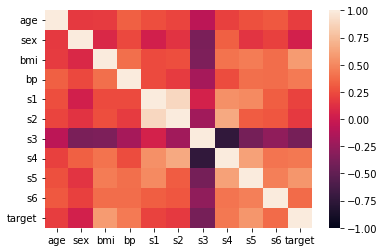

In [ ]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# 당뇨병 데이터 세트를 적재한다. 
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

print(diabetes_X.data.shape )
# 하나의 특징(BMI)만 추려내서 2차원 배열로 만든다. BMI 특징의 인덱스가 2이다.
diabetes_X_new = diabetes_X[:, np.newaxis, 2]
print(diabetes_X_new.data.shape )

# 학습 데이터와 테스트 데이터를 분리한다. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_new, diabetes_y, test_size=0.1, random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
# regression coeff.s & score
regr.coef_, regr.intercept_
print(regr.score(X_train, y_train))

# 테스트 데이터로 예측해보자. 
y_pred = regr.predict(X_test) 

# 실제 데이터와 예측 데이터를 비교해보자. 
# plt.plot(y_test, y_pred, '.')

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

########################################
# 당뇨병 데이터 구조 => DataFrame
# Attribute Information:
#     - age     age in years
#     - sex
#     - bmi     body mass index
#     - bp      average blood pressure
#     - s1      tc, T-Cells (a type of white blood cells)
#     - s2      ldl, low-density lipoproteins
#     - s3      hdl, high-density lipoproteins
#     - s4      tch, thyroid stimulating hormone
#     - s5      ltg, lamotrigine
#     - s6      glu, blood sugar level
#
# [참고] https://wikidocs.net/49981
#
########################################
df0 = datasets.load_diabetes(as_frame=True)
df0
type(df0)
df0.keys()
print(df0.DESCR)
df0.frame.shape
df0.frame.head()
# Make dataframe from data bunch
df=df0.frame
df.shape
df.info()
df.head()
df.columns
# ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6','target']
df[['bmi']].plot()
df[['bp']].plot()
# plt.show()
# 혈당치(glucose)와 target (당뇨병 진행도)
df[['s6']].plot()
df[['target']].plot()
plt.show()
df[['bmi','bp','s6']].plot()
# X and y
# 하나의 특징(s6: 혈당치)만 추려내서 2차원 배열로 만든다. BMI 특징의 인덱스가 2이다.
diabetes_X_new2=df.s6.values 
diabetes_X_new2=diabetes_X_new2[:,np.newaxis]
diabetes_X_new2.shape, diabetes_y.shape

X_train, X_test, y_train, y_test = train_test_split(diabetes_X_new2, diabetes_y, test_size=0.1, random_state=0)
X_train.shape
regr2 = linear_model.LinearRegression()
regr2.fit(X_train, y_train)
# regression coeff.s & score
regr2.coef_, regr2.intercept_
print(regr2.score(X_train, y_train))

# 테스트 데이터로 예측해보자. 
y_pred = regr2.predict(X_test) 

# 실제 데이터와 예측 데이터를 비교해보자. 
# plt.plot(y_test, y_pred, '.')

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, 'r', linewidth=3)
plt.show()

#
# 상관도표 (correlation) : df.corr()
#
import seaborn as sns
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns,
        vmin= -1, vmax=1.0)
plt.show()

sns.pairplot(df)
plt.show()

# s5(lamotrigine )와 target (당뇨병 진행도)
df[['s5']].plot()
df[['target']].plot()

sns.pairplot(df[['s5','target']])
plt.show()
# X and y
# 하나의 특징(s5: lamotrigine)만 추려내서 2차원 배열로 만든다. BMI 특징의 인덱스가 2이다.

diabetes_X_new3=df.s5.values 
diabetes_X_new3=diabetes_X_new3[:,np.newaxis]
diabetes_X_new3.shape, diabetes_y.shape

X_train, X_test, y_train, y_test = train_test_split(diabetes_X_new3, diabetes_y, test_size=0.1, random_state=0)
X_train.shape
regr3 = linear_model.LinearRegression()
regr3.fit(X_train, y_train)

# 테스트 데이터로 예측해보자. 
y_pred = regr3.predict(X_test) 

# 실제 데이터와 예측 데이터를 비교해보자. 
# plt.plot(y_test, y_pred, '.')

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, 'r', linewidth=3)
plt.show()

# regression coeff.s & score
regr3.coef_,regr3.intercept_
print(regr3.score(X_train, y_train))

##################################
# 비교 : bmi, s6, s5
##################################
print(regr.score(X_train, y_train))
print(regr2.score(X_train, y_train))
print(regr3.score(X_train, y_train))

sns.pairplot(df[['bmi','s5','s6','target']])
plt.show()
#
# {DIY} bp vs. target
#
df[['bmi','bp','s6']].plot()

diabetes_X_new = diabetes_X[:, np.newaxis, 3]
print(diabetes_X_new.data.shape )
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_new, diabetes_y, test_size=0.1, random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
# regression coeff.s & score
regr.coef_, regr.intercept_
print(regr.score(X_train, y_train))

# 테스트 데이터로 예측해보자. 
y_pred = regr.predict(X_test) 

# 실제 데이터와 예측 데이터를 비교해보자. 
# plt.plot(y_test, y_pred, '.')

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()